<a href="https://colab.research.google.com/github/marihatabassum/MyMet/blob/main/hurricanes_Typhoons_analysis_frm_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install regex --upgrade --quiet
import re
import datetime as dt


In [ ]:
pacific_df=pd.read_csv("/content/drive/MyDrive/Python_Projects/pacific.csv")
pacific_df

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,20151128,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,20151128,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,20151129,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,20151129,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pacific_df.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,2.613700e+04,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000
mean,1.988908e+07,896.050427,48.949344,18.176225,-745.064851,-746.312125,-748.290929,-746.320542,-751.604622,-752.094923,-752.701917,-752.102957,-753.584382,-753.787160,-754.046945,-753.774534
std,1.688455e+05,672.008065,25.334450,996.896388,447.193480,444.883379,441.232953,444.939111,435.198872,434.303796,433.202389,434.291049,431.605766,431.239618,430.773515,431.263235
min,1.949061e+07,0.000000,10.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.976081e+07,0.000000,30.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.990081e+07,600.000000,45.000000,941.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,2.003092e+07,1200.000000,65.000000,1002.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015113e+07,2300.000000,185.000000,1021.000000,300.000000,270.000000,180.000000,1180.000000,150.000000,150.000000,105.000000,150.000000,100.000000,75.000000,75.000000,100.000000


In [ ]:
pacific_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                26137 non-null  object
 1   Name              26137 non-null  object
 2   Date              26137 non-null  int64 
 3   Time              26137 non-null  int64 
 4   Event             26137 non-null  object
 5   Status            26137 non-null  object
 6   Latitude          26137 non-null  object
 7   Longitude         26137 non-null  object
 8   Maximum Wind      26137 non-null  int64 
 9   Minimum Pressure  26137 non-null  int64 
 10  Low Wind NE       26137 non-null  int64 
 11  Low Wind SE       26137 non-null  int64 
 12  Low Wind SW       26137 non-null  int64 
 13  Low Wind NW       26137 non-null  int64 
 14  Moderate Wind NE  26137 non-null  int64 
 15  Moderate Wind SE  26137 non-null  int64 
 16  Moderate Wind SW  26137 non-null  int64 
 17  Moderate Win

In [ ]:
pacific_df["Date"]=pd.to_datetime(pacific_df["Date"], format="%Y%m%d")
pacific_df

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,1949-06-11,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,1949-06-11,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,1949-06-11,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,1949-06-11,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,1949-06-12,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,2015-11-28,1200,,LO,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,2015-11-28,1800,,LO,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,2015-11-29,0,,LO,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,2015-11-29,600,,LO,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#want to create columns Latitude Hemisphere and Longitude Hemisphere with code 0=N, 1=S & 0=E, 1=W.

def hemisphere(coord):
        hem=re.findall(r'[NSWE]', coord)[0]
        if hem=='N' or hem=='E':
          return 0
        else:
            return 1


In [ ]:
#creatinf the column Latitude Hemisphere.
pacific_df['Latitude_Hemisphere']=pacific_df['Latitude'].apply(hemisphere)
pacific_df['Longitude_Hemisphere']=pacific_df['Longitude'].apply(hemisphere)
pacific_df['Latitude_Hemisphere']=pacific_df['Latitude_Hemisphere'].astype('category')
pacific_df['Longitude_Hemisphere']=pacific_df['Longitude_Hemisphere'].astype('category')

In [ ]:
pacific_df['Latitude'] =  pacific_df['Latitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])
pacific_df['Longitude'] =   pacific_df['Longitude'].apply(lambda x: re.match('[0-9]{1,3}.[0-9]{0,1}' , x)[0])

In [ ]:
#the missing values are given by -999, so, we need to fill them appropriately.
#show the count of missing values and fill them with mean!

for column in pacific_df.columns:
  missing_cnt=pacific_df[column][pacific_df[column]==-999].count()
  print('Missing Values in column{col}='.format(col=column), missing_cnt)
  if missing_cnt!=0:
    print('in', column)
    mean=round(pacific_df[column][pacific_df[column] != -999].mean())
    print('mean',mean)
    index=pacific_df.loc[pacific_df[column]==-999, column].index
    print('index', index)
    pacific_df.loc[pacific_df[column]==-999, column]= mean
    #print(pacific_df.loc[index, column])


Missing Values in columnID= 0
Missing Values in columnName= 0
Missing Values in columnDate= 0
Missing Values in columnTime= 0
Missing Values in columnEvent= 0
Missing Values in columnStatus= 0
Missing Values in columnLatitude= 0
Missing Values in columnLongitude= 0
Missing Values in columnMaximum Wind= 0
Missing Values in columnMinimum Pressure= 12804
in Minimum Pressure
mean 995
index Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            18312, 18313, 18314, 18315, 18316, 19081, 19082, 19083, 19084,
            19085],
           dtype='int64', length=12804)
Missing Values in columnLow Wind NE= 19750
in Low Wind NE
mean 40
index Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            19740, 19741, 19742, 19743, 20135, 20966, 21032, 21327, 21517,
            22414],
           dtype='int64', length=19750)
Missing Values in columnLow Wind SE= 19750
in Low

In [ ]:
#Restructure the dataframe for visibility and remove columns ID and Event.
pacific_df=pacific_df[["ID", "Name", "Date", "Time", "Event", "Status", "Latitude", "Latitude_Hemisphere", "Longitude", "Longitude_Hemisphere", "Maximum Wind", "Minimum Pressure", "Low Wind NE", "Low Wind SE", "Low Wind SW", "Low Wind NW", "Moderate Wind NE",
                       "Moderate Wind SE", "Moderate Wind SW", "Moderate Wind NW", "High Wind NE", "High Wind SE", "High Wind SW", "High Wind NW"]]

In [ ]:
pacific_df

,ID,Name,Date,Time,Event,Status,Latitude,Latitude_Hemisphere,Longitude,Longitude_Hemisphere,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,1949-06-11,0,,TS,20.2,0,106.3,1,...,27,35,13,11,9,11,5,4,3,5
1,EP011949,UNNAMED,1949-06-11,600,,TS,20.2,0,106.4,1,...,27,35,13,11,9,11,5,4,3,5
2,EP011949,UNNAMED,1949-06-11,1200,,TS,20.2,0,106.7,1,...,27,35,13,11,9,11,5,4,3,5
3,EP011949,UNNAMED,1949-06-11,1800,,TS,20.3,0,107.7,1,...,27,35,13,11,9,11,5,4,3,5
4,EP011949,UNNAMED,1949-06-12,0,,TS,20.4,0,108.6,1,...,27,35,13,11,9,11,5,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,EP222015,SANDRA,2015-11-28,1200,,LO,21.7,0,109.0,1,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,2015-11-28,1800,,LO,22.4,0,108.7,1,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,2015-11-29,0,,LO,23.1,0,108.3,1,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,2015-11-29,600,,LO,23.5,0,107.9,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#change all time to format HHMM.
pacific_df["Time"]=pacific_df['Time'].astype('object')

def hhmm(time):
  time=str(time)
  digits=re.findall(r'\d', time)
  t=''
  if len(digits)==1:
    t='0{i}00'.format(i=time)
  elif len(digits)==2:
    t='{i}00'.format(i=time)
  elif len(digits)==3:
    t='0{i}'.format(i=time)
  else:
    t=time
  return t

#Apply the function
pacific_df['Time']=pacific_df["Time"].apply(hhmm)

#Convert the column into Datetime.
pacific_df['Time'] =pd.to_datetime(pacific_df['Time'], format='%H%M').dt.time

In [ ]:
#Convert the status column to categorical.
pacific_df['Status']=pacific_df['Status'].astype('category')

data=pacific_df.drop(columns=['ID', 'Event'])
data

,Name,Date,Time,Status,Latitude,Latitude_Hemisphere,Longitude,Longitude_Hemisphere,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,UNNAMED,1949-06-11,00:00:00,TS,20.2,0,106.3,1,45,995,...,27,35,13,11,9,11,5,4,3,5
1,UNNAMED,1949-06-11,06:00:00,TS,20.2,0,106.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5
2,UNNAMED,1949-06-11,12:00:00,TS,20.2,0,106.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
3,UNNAMED,1949-06-11,18:00:00,TS,20.3,0,107.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
4,UNNAMED,1949-06-12,00:00:00,TS,20.4,0,108.6,1,45,995,...,27,35,13,11,9,11,5,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,SANDRA,2015-11-28,12:00:00,LO,21.7,0,109.0,1,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,SANDRA,2015-11-28,18:00:00,LO,22.4,0,108.7,1,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,SANDRA,2015-11-29,00:00:00,LO,23.1,0,108.3,1,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,SANDRA,2015-11-29,06:00:00,LO,23.5,0,107.9,1,25,1009,...,0,0,0,0,0,0,0,0,0,0


####Statistical analysis of the data!

In [ ]:
#Display the data
data.head(10)

,Name,Date,Time,Status,Latitude,Latitude_Hemisphere,Longitude,Longitude_Hemisphere,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,UNNAMED,1949-06-11,00:00:00,TS,20.2,0,106.3,1,45,995,...,27,35,13,11,9,11,5,4,3,5
1,UNNAMED,1949-06-11,06:00:00,TS,20.2,0,106.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5
2,UNNAMED,1949-06-11,12:00:00,TS,20.2,0,106.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
3,UNNAMED,1949-06-11,18:00:00,TS,20.3,0,107.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
4,UNNAMED,1949-06-12,00:00:00,TS,20.4,0,108.6,1,45,995,...,27,35,13,11,9,11,5,4,3,5
5,UNNAMED,1949-06-12,06:00:00,TS,20.5,0,109.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5
6,UNNAMED,1949-06-12,12:00:00,TS,20.6,0,110.2,1,45,995,...,27,35,13,11,9,11,5,4,3,5
7,UNNAMED,1949-06-17,12:00:00,TS,14.1,0,107.0,1,45,995,...,27,35,13,11,9,11,5,4,3,5
8,UNNAMED,1949-06-17,18:00:00,TS,14.6,0,107.7,1,45,995,...,27,35,13,11,9,11,5,4,3,5
9,UNNAMED,1949-06-18,00:00:00,TS,15.0,0,108.4,1,45,995,...,27,35,13,11,9,11,5,4,3,5


####Top Ten Cyclones whic occurred the maximum number of times!

In [ ]:
lst=[x.strip() for x in data.groupby('Name').count().sort_values(by='Date', ascending=False).index[:15]]
lst

['UNNAMED',
 'FERNANDA',
 'JOHN',
 'ESTELLE',
 'DANIEL',
 'GUILLERMO',
 'HILARY',
 'CARLOTTA',
 'GENEVIEVE',
 'BLANCA',
 'JIMENA',
 'OLIVIA',
 'LINDA',
 'DOLORES',
 'KRISTY']

In [ ]:
val=data.groupby('Name').count().sort_values(by='Date', ascending=False)[:10]
val

,Date,Time,Status,Latitude,Latitude_Hemisphere,Longitude,Longitude_Hemisphere,Maximum Wind,Minimum Pressure,Low Wind NE,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
Name,,,,,,,,,,,,,,,,,,,,,
UNNAMED,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180,...,2180,2180,2180,2180,2180,2180,2180,2180,2180,2180
FERNANDA,318,318,318,318,318,318,318,318,318,318,...,318,318,318,318,318,318,318,318,318,318
JOHN,295,295,295,295,295,295,295,295,295,295,...,295,295,295,295,295,295,295,295,295,295
ESTELLE,293,293,293,293,293,293,293,293,293,293,...,293,293,293,293,293,293,293,293,293,293
DANIEL,292,292,292,292,292,292,292,292,292,292,...,292,292,292,292,292,292,292,292,292,292
GUILLERMO,285,285,285,285,285,285,285,285,285,285,...,285,285,285,285,285,285,285,285,285,285
HILARY,277,277,277,277,277,277,277,277,277,277,...,277,277,277,277,277,277,277,277,277,277
CARLOTTA,266,266,266,266,266,266,266,266,266,266,...,266,266,266,266,266,266,266,266,266,266
GENEVIEVE,264,264,264,264,264,264,264,264,264,264,...,264,264,264,264,264,264,264,264,264,264


In [ ]:
val=data.groupby('Name').count().sort_values(by='Date', ascending=False)[:10]['Date'].values
val

array([2180,  318,  295,  293,  292,  285,  277,  266,  264,  258])

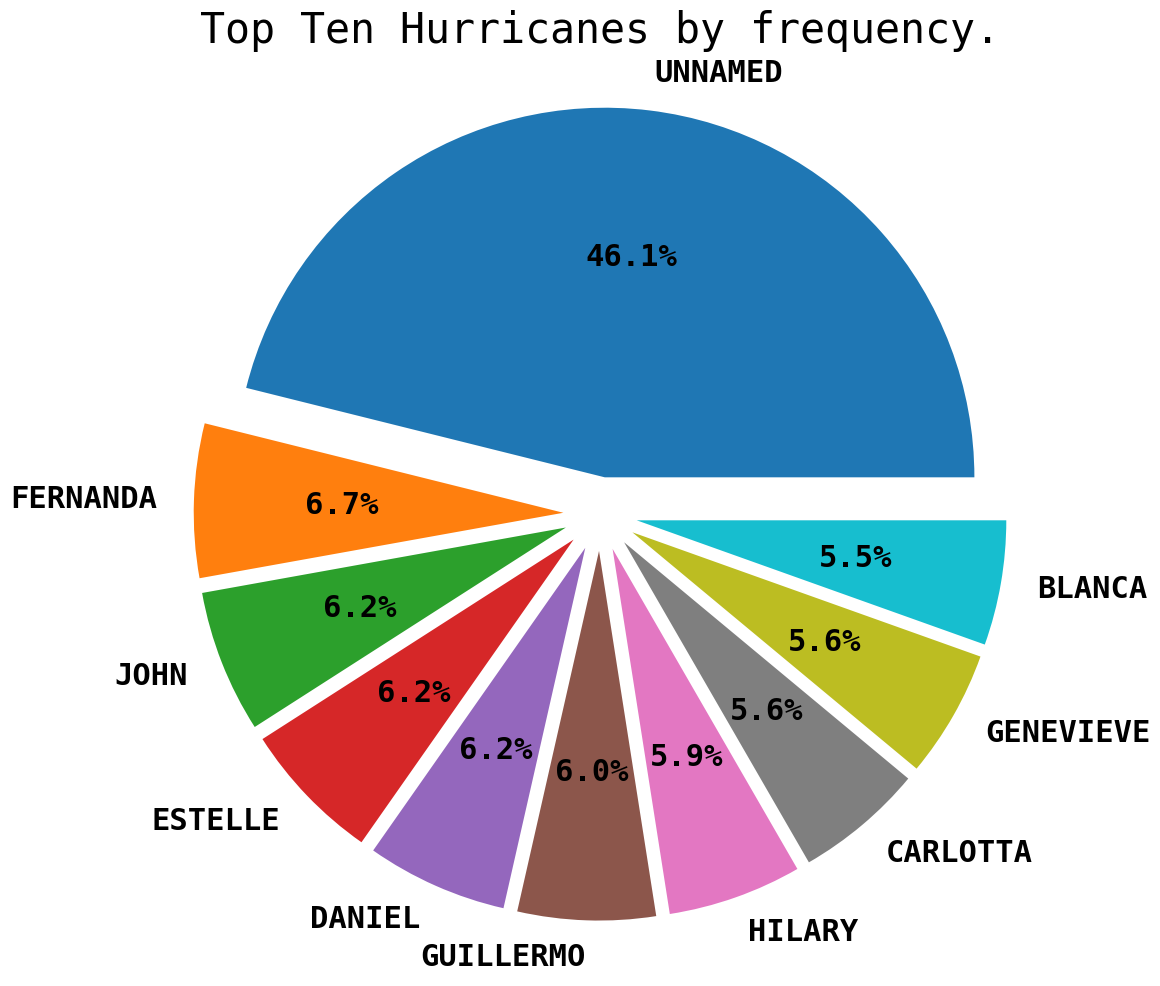

In [ ]:
#find the top ten cyclones which have occured the maximum number of times.

lst=[x.strip() for x in data.groupby('Name').count().sort_values(by='Date', ascending=False).index[:10]]
val=data.groupby('Name').count().sort_values(by='Date', ascending=False)[:10]['Date'].values
font={ 'family': 'monospace',
      'weight': 'bold',
      'size': 22}
plt.rc('font', **font)
fig, ax=plt.subplots()
fig.set_size_inches(12, 12)
ax.pie(labels=lst, x=val, autopct='%.1f%%', explode=[0.1 for x in range(10)])
plt.title('Top Ten Hurricanes by frequency.', fontsize=30)
plt.show()

###Frequency of Hurricanes by Month.



Text(0.5, 1.0, 'Frequency of Cyclones by Month.')

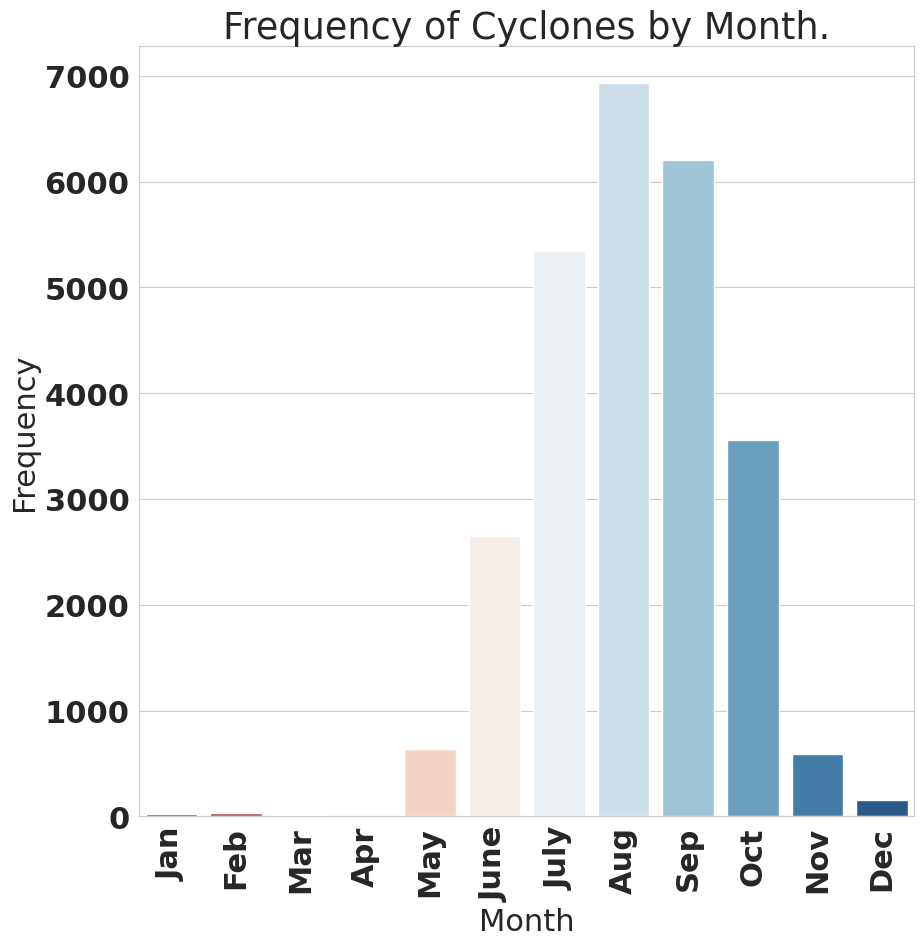

In [ ]:
data['Month']=data['Date'].apply(lambda x: x.month)
data['Year'] =data["Date"].apply(lambda x: x.year)
mnt=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June','July', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
temp=data.groupby('Month').count()
temp.loc[4]=0
temp=temp.sort_values(by="Month", ascending=False)
font={'family': 'monospace',
      'weight': 'bold',
      'size': 22}
plt.rc('font', **font)
plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')
ax=sns.barplot(x=temp.index, y="Date", data=temp, palette="RdBu")
plt.xticks([0, 1, 2,3,4, 5,6,7,8,9,10,11], mnt, rotation=90)
plt.ylabel('Frequency')
plt.title('Frequency of Cyclones by Month.')

###Year Wise Frequency of Hurricanes.

In [ ]:
temp=data.groupby('Year').count().sort_values(by="Month", ascending=False)
temp

,Name,Date,Time,Status,Latitude,Latitude_Hemisphere,Longitude,Longitude_Hemisphere,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Month
Year,,,,,,,,,,,,,,,,,,,,,
1992,890,890,890,890,890,890,890,890,890,890,...,890,890,890,890,890,890,890,890,890,890
2014,840,840,840,840,840,840,840,840,840,840,...,840,840,840,840,840,840,840,840,840,840
1990,767,767,767,767,767,767,767,767,767,767,...,767,767,767,767,767,767,767,767,767,767
1997,725,725,725,725,725,725,725,725,725,725,...,725,725,725,725,725,725,725,725,725,725
2015,717,717,717,717,717,717,717,717,717,717,...,717,717,717,717,717,717,717,717,717,717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
1949,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
1955,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70


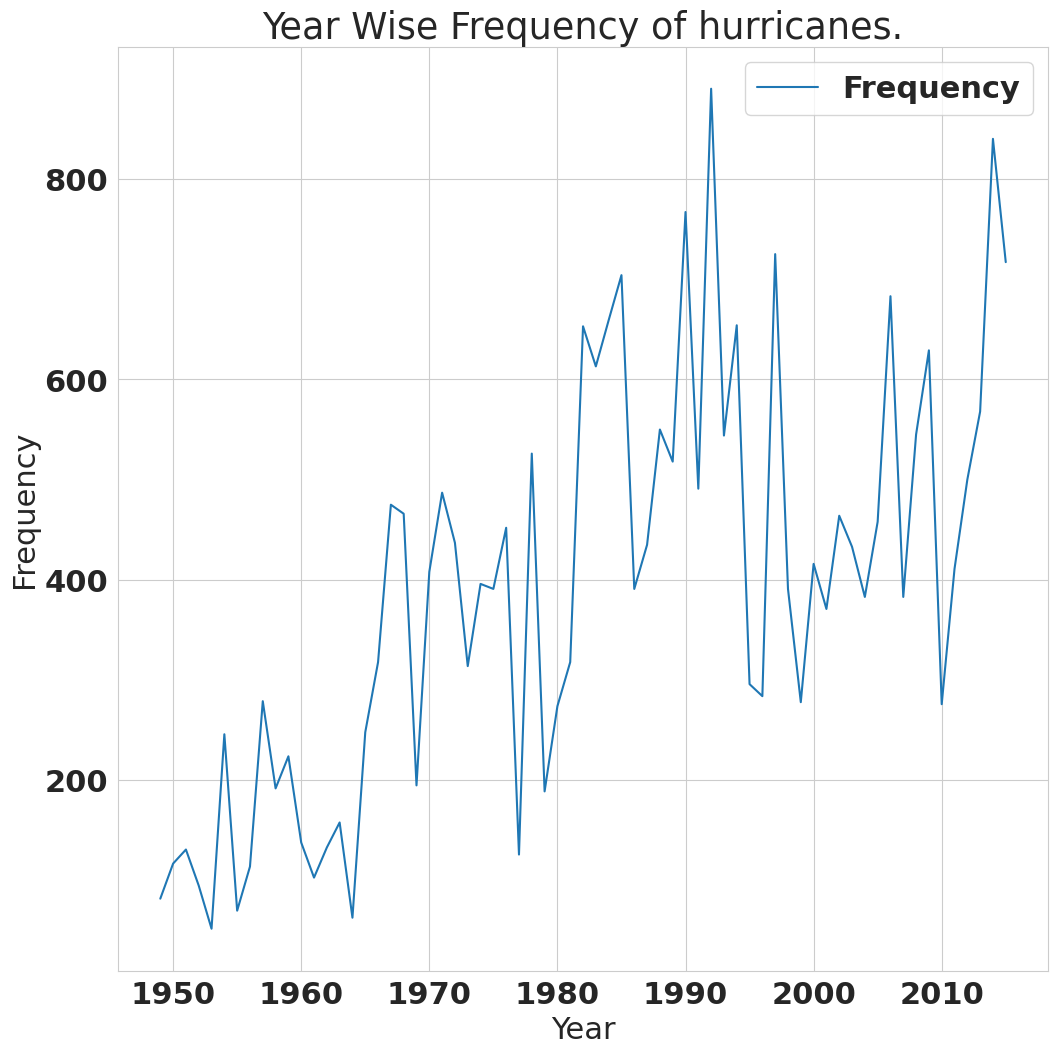

In [ ]:
#Year-wise frequency of Hurricanes.
temp=data.groupby('Year').count().sort_values(by="Month", ascending=False)
plt.figure(figsize=(12, 12))
sns.lineplot(x=temp.index, y="Month", data=temp, label='Frequency')
plt.ylabel('Frequency')
plt.title('Year Wise Frequency of hurricanes.')
plt.show()

<ipython-input-27-cfe16c9b9373>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['Date'].values , norm_hist = True , axlabel = 'Probability Distribution of Frequency of Cyclones.')


<Axes: xlabel='Probability Distribution of Frequency of Cyclones.', ylabel='Density'>

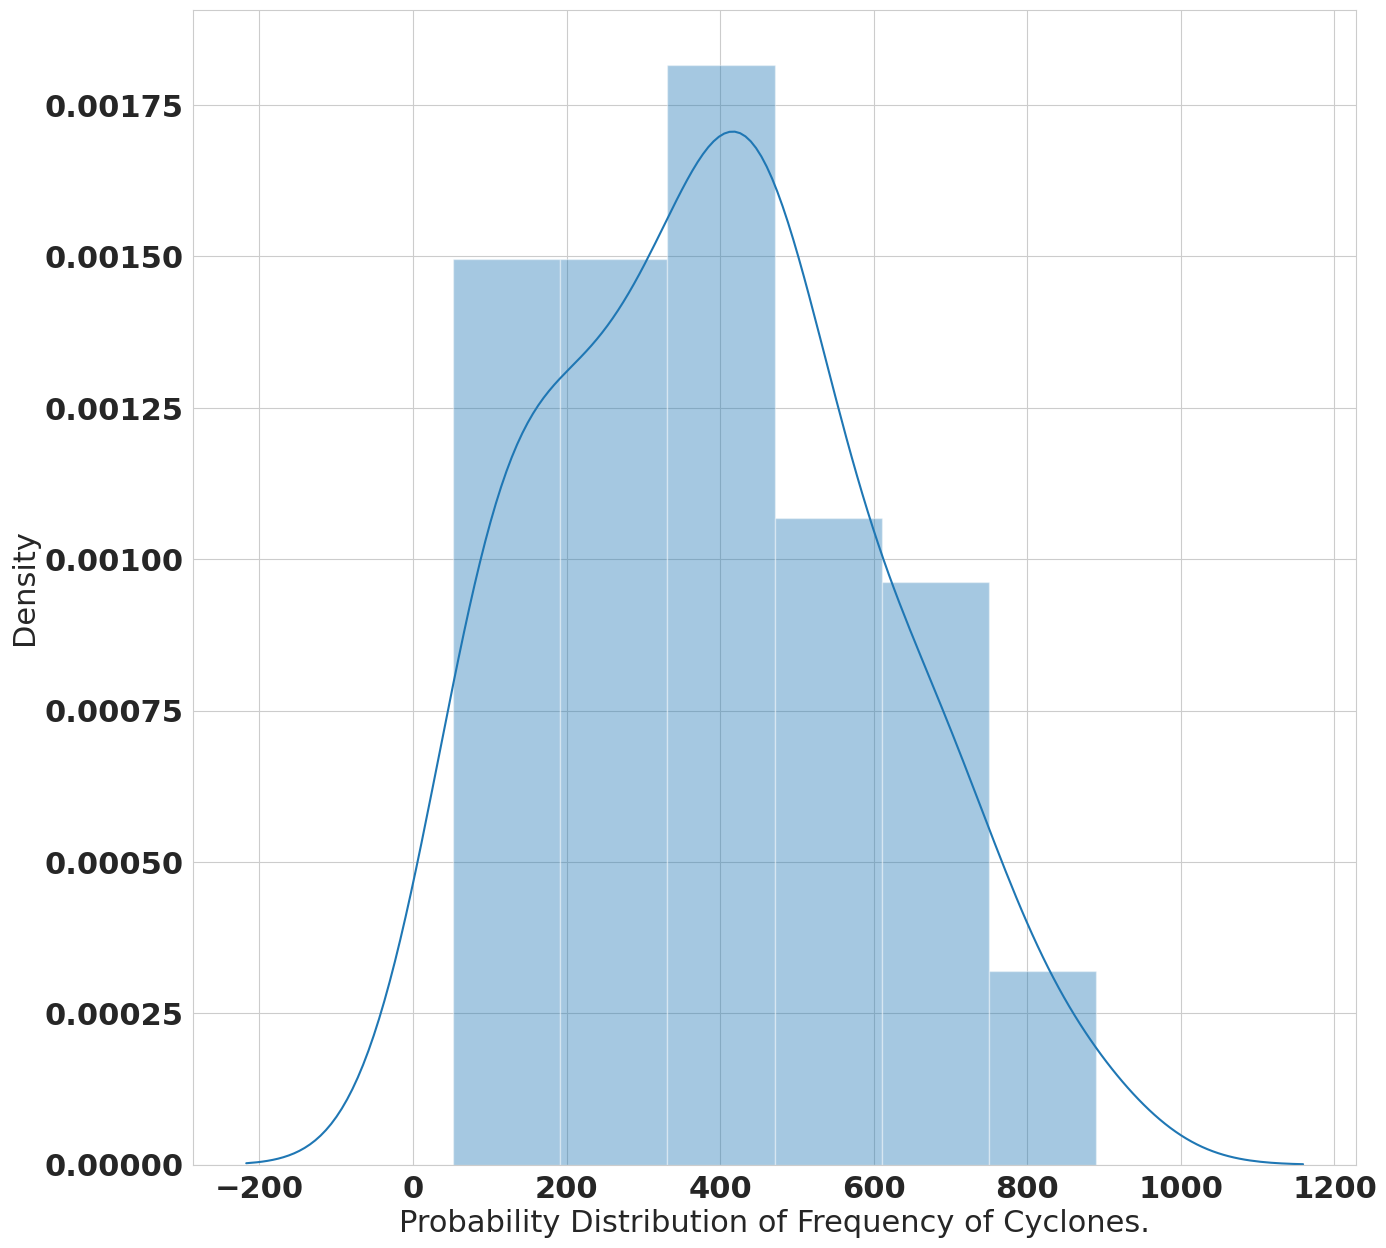

In [ ]:
# Probability Distribution Function of Frequency.
temp = data.groupby('Year').count().sort_values(by = 'Date' , ascending = False)
plt.figure(figsize=(15,15))
sns.distplot(temp['Date'].values , norm_hist = True , axlabel = 'Probability Distribution of Frequency of Cyclones.')

####Frequency of Cyclones by Category.


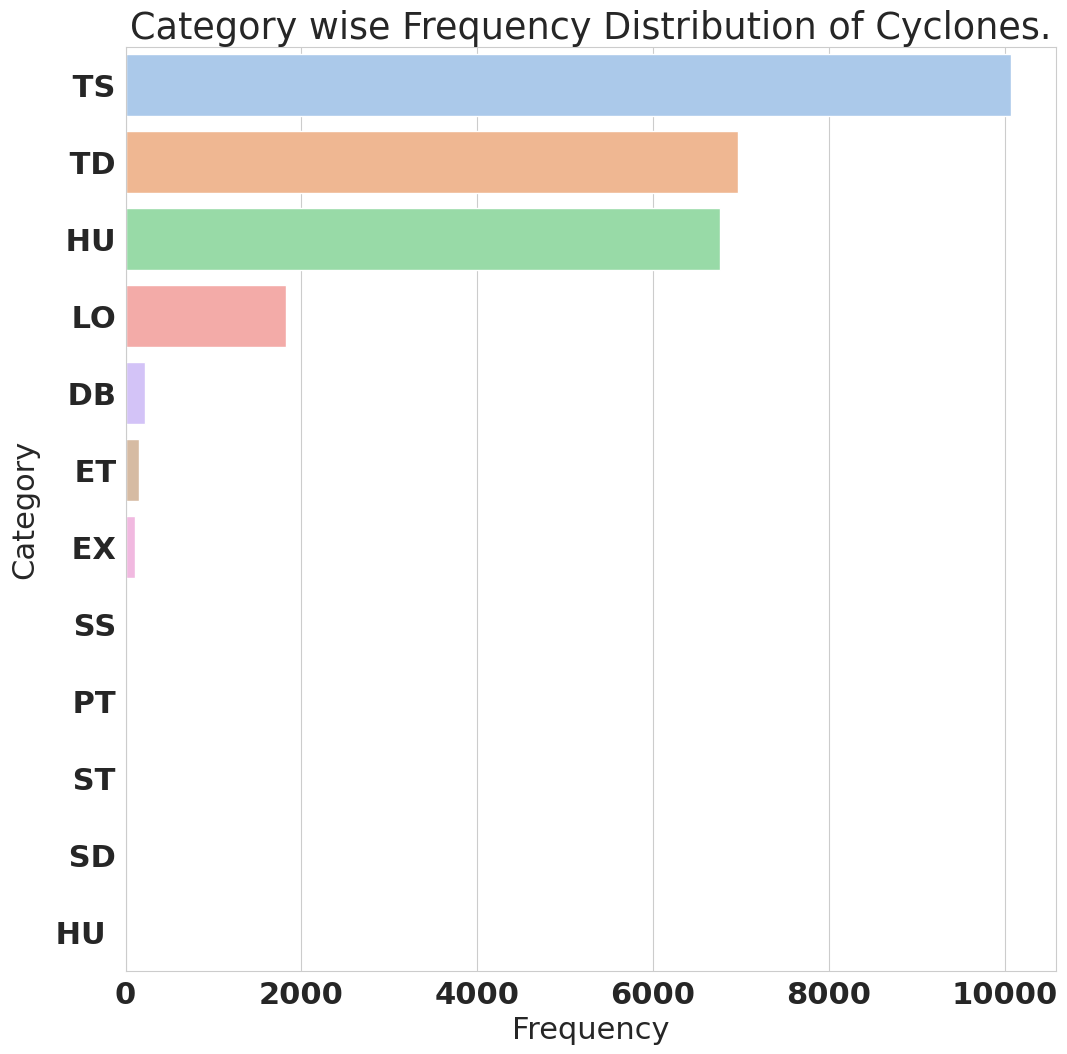

In [ ]:
## Frequency of Cyclones by Category
# TD – Tropical cyclone of tropical depression intensity (< 34 knots)
# TS – Tropical cyclone of tropical storm intensity (34-63 knots)
# HU – Tropical cyclone of hurricane intensity (> 64 knots)
# EX – Extratropical cyclone (of any intensity)
# SD – Subtropical cyclone of subtropical depression intensity (< 34 knots)
# SS – Subtropical cyclone of subtropical storm intensity (> 34 knots)
# LO – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)
# WV – Tropical Wave (of any intensity)
# DB – Disturbance (of any intensity)
temp = data.groupby('Status').count().sort_values(by = 'Date' , ascending = False)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
sns.barplot(y = list(temp.index) , x = 'Date' , data = temp, palette= 'pastel' )
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Category wise Frequency Distribution of Cyclones.')
plt.show()

###Classification Model!!
1. Decision Tree

In [ ]:
#import Decision tree Classifier.
from sklearn.tree import DecisionTreeClassifier

#Import train-test split.
from sklearn.model_selection import train_test_split

#Import accuracy score.
from sklearn.metrics import accuracy_score

#Import Recall Score.
from sklearn.metrics import recall_score

#import Precision score.
from sklearn.metrics import precision_score
#from the model
dt=DecisionTreeClassifier(min_samples_leaf=50, criterion='entropy')






In [ ]:

x_train = data[['Latitude', 'Latitude_Hemisphere',
       'Longitude', 'Longitude_Hemisphere', 'Maximum Wind', 'Minimum Pressure',
       'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW',
       'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW',
       'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW',
       'High Wind NW' , 'Month' , 'Year']]
y_train = data['Status']

In [ ]:
#Perform the kfold Validation.

#Import the kFold library.
from sklearn.model_selection import KFold
kf=KFold(n_splits=10, shuffle=True, random_state=42)

dt_scores=[]
dt_recall_scores=[]
dt_precision_scores=[]
for tr, ts in kf.split(x_train):
  xtr=x_train.loc[tr]
  ytr=y_train.loc[tr]
  xts=x_train.loc[ts]
  yts=y_train.loc[ts]
  dt.fit(xtr, ytr)
  y_pred=dt.predict(xts)
  dt_scores.append(accuracy_score(yts, y_pred))
  dt_recall_scores.append(recall_score(yts, y_pred, average="weighted"))
  dt_precision_scores.append(precision_score(yts,y_pred, average="weighted"))
  #dt.fit(x_train, y_train)
  #y_pred=dt.predict(x_test)
  #accuracy_score(y_test, y_pred)
  dt_scr={'accuracy': np.mean(dt_scores), 'recall': np.mean(dt_recall_scores), 'precision': np.mean(dt_precision_scores)}
  print('Accuracy score for Decision Tree is:', dt_scr["accuracy"])
  print('Recall score for Decision Tree is:', dt_scr["recall"])
  print('Precipitation score for Decision Tree is:', dt_scr['precision'])


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score for Decision Tree is: 0.9625095638867636
Recall score for Decision Tree is: 0.9625095638867636
Precipitation score for Decision Tree is: 0.9609914589050468
Accuracy score for Decision Tree is: 0.96327467482785
Recall score for Decision Tree is: 0.96327467482785
Precipitation score for Decision Tree is: 0.9630801712069832


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score for Decision Tree is: 0.9639122672787553
Recall score for Decision Tree is: 0.9639122672787553
Precipitation score for Decision Tree is: 0.9631099678560419
Accuracy score for Decision Tree is: 0.9653787299158377
Recall score for Decision Tree is: 0.9653787299158377
Precipitation score for Decision Tree is: 0.9645860810513884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score for Decision Tree is: 0.9644988523335882
Recall score for Decision Tree is: 0.9644988523335882
Precipitation score for Decision Tree is: 0.9635732632208084
Accuracy score for Decision Tree is: 0.9651236929354755
Recall score for Decision Tree is: 0.9651236929354755
Precipitation score for Decision Tree is: 0.9644339185128898


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score for Decision Tree is: 0.9655153568696031
Recall score for Decision Tree is: 0.9655153568696031
Precipitation score for Decision Tree is: 0.9644691691716956
Accuracy score for Decision Tree is: 0.9658554053052963
Recall score for Decision Tree is: 0.9658554053052963
Precipitation score for Decision Tree is: 0.9646929583211808
Accuracy score for Decision Tree is: 0.9651843939491395
Recall score for Decision Tree is: 0.9651843939491395
Precipitation score for Decision Tree is: 0.964135009514997
Accuracy score for Decision Tree is: 0.9651068271145011
Recall score for Decision Tree is: 0.9651068271145011
Precipitation score for Decision Tree is: 0.9639969870825983


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###US Hurricane Dataset Analysis

In [ ]:
#Basic packages
import numpy as np #linear algebra
import pandas as pd #Data Processing , CSV file I/O(e.g. pd.read_csv)

import random as rd #generating random numbers
import datetime #manipulating date formats
#VIZ

import matplotlib.pyplot as plt # basic plotting
import seaborn as sns  # for prettier plots
import warnings
warnings.filterwarnings('ignore')
#time Series
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf, arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as scs
from matplotlib import rcParams


In [ ]:
atlantic_df=pd.read_csv("/content/drive/MyDrive/Python_Projects/atlantic.csv")
atlantic_df

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49100,AL122015,KATE,20151112,1200,,EX,41.3N,50.4W,55,981,...,180,120,120,120,60,0,0,0,0,0
49101,AL122015,KATE,20151112,1800,,EX,41.9N,49.9W,55,983,...,180,120,120,120,60,0,0,0,0,0
49102,AL122015,KATE,20151113,0,,EX,41.5N,49.2W,50,985,...,200,220,120,120,60,0,0,0,0,0
49103,AL122015,KATE,20151113,600,,EX,40.8N,47.5W,45,985,...,180,220,0,0,0,0,0,0,0,0


In [ ]:
atlantic_df.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,4.910500e+04,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000
mean,1.949802e+07,910.125975,52.005091,-251.406496,-868.671031,-869.315772,-872.676428,-871.409245,-875.570940,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295
std,4.461850e+05,671.043363,27.681902,964.313907,353.299666,351.548910,342.153768,345.628984,333.651396,333.133376,330.526085,331.535176,328.027275,327.774794,327.021430,327.408253
min,1.851062e+07,0.000000,-99.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.911110e+07,600.000000,35.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.956093e+07,1200.000000,45.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,1.989081e+07,1800.000000,70.000000,990.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015111e+07,2330.000000,165.000000,1024.000000,710.000000,600.000000,640.000000,530.000000,360.000000,300.000000,330.000000,360.000000,180.000000,250.000000,150.000000,180.000000


In [ ]:
atlantic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49105 entries, 0 to 49104
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                49105 non-null  object
 1   Name              49105 non-null  object
 2   Date              49105 non-null  int64 
 3   Time              49105 non-null  int64 
 4   Event             49105 non-null  object
 5   Status            49105 non-null  object
 6   Latitude          49105 non-null  object
 7   Longitude         49105 non-null  object
 8   Maximum Wind      49105 non-null  int64 
 9   Minimum Pressure  49105 non-null  int64 
 10  Low Wind NE       49105 non-null  int64 
 11  Low Wind SE       49105 non-null  int64 
 12  Low Wind SW       49105 non-null  int64 
 13  Low Wind NW       49105 non-null  int64 
 14  Moderate Wind NE  49105 non-null  int64 
 15  Moderate Wind SE  49105 non-null  int64 
 16  Moderate Wind SW  49105 non-null  int64 
 17  Moderate Win

In [ ]:
atlantic_df.shape

(49105, 22)

In [ ]:
#missing Values
((atlantic_df.isnull()).any()).sum()

0

In [ ]:
atlantic_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49100    False
49101    False
49102    False
49103    False
49104    False
Length: 49105, dtype: bool

In [ ]:
#Find duplicated data
atlantic_df[atlantic_df.duplicated()==True]

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW


In [ ]:
atlantic_df.drop_duplicates()  #there is no duplicates though!!!

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49100,AL122015,KATE,20151112,1200,,EX,41.3N,50.4W,55,981,...,180,120,120,120,60,0,0,0,0,0
49101,AL122015,KATE,20151112,1800,,EX,41.9N,49.9W,55,983,...,180,120,120,120,60,0,0,0,0,0
49102,AL122015,KATE,20151113,0,,EX,41.5N,49.2W,50,985,...,200,220,120,120,60,0,0,0,0,0
49103,AL122015,KATE,20151113,600,,EX,40.8N,47.5W,45,985,...,180,220,0,0,0,0,0,0,0,0


In [ ]:
atlantic_df.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,4.910500e+04,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000
mean,1.949802e+07,910.125975,52.005091,-251.406496,-868.671031,-869.315772,-872.676428,-871.409245,-875.570940,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295
std,4.461850e+05,671.043363,27.681902,964.313907,353.299666,351.548910,342.153768,345.628984,333.651396,333.133376,330.526085,331.535176,328.027275,327.774794,327.021430,327.408253
min,1.851062e+07,0.000000,-99.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.911110e+07,600.000000,35.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.956093e+07,1200.000000,45.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,1.989081e+07,1800.000000,70.000000,990.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015111e+07,2330.000000,165.000000,1024.000000,710.000000,600.000000,640.000000,530.000000,360.000000,300.000000,330.000000,360.000000,180.000000,250.000000,150.000000,180.000000


####Preprocess the data!

In [ ]:
atlantic_df["Date"]=atlantic_df["Date"].astype("object")


In [ ]:
for i, date_str in enumerate(atlantic_df["Date"].unique()):
    atlantic_df.loc[atlantic_df["Date"]==date_str, "Date"] = f"{str(date_str)[0:4]}-{str(date_str)[4:6]}-{str(date_str)[6:]}"

In [ ]:
atlantic_df["Time"].unique()

array([   0,  600, 1200, 1800, 2100, 1500, 2000,  300, 1100, 1000, 1700,
       1600,  400,  800,  900, 1300, 1400,  700, 2200, 1900, 2300,  200,
        500,  100, 1930, 1630, 1830, 1530,   30, 1330, 1725,  530, 2230,
       1145, 2046, 1720,  130,  834,  840,  905,  830, 2130,  615, 2152,
       1730,  330,  930,  430, 1230, 1130,  630,  756, 1105,  915,   45,
       2013, 1030, 1945, 2045,  730, 1415,  650, 2235,  245, 1845, 1110,
       1445,  740, 2145,  645, 1115,  340,  845, 1315, 1745, 1820, 1430,
       2030, 2315,  515, 1245, 1645,  230,  525,  935,  410,  315, 1615,
       2330,  445,  810, 2245])

In [ ]:
atlantic_df["Time"]=atlantic_df["Time"].astype("object")
time_replace=[str(x) for x in atlantic_df["Time"].unique()]
for i, txt in enumerate(time_replace):
  time_replace[i]=txt.rjust(4, '0')
  time_replace[i]=f"{time_replace[i][0:2]}:{time_replace[i][2:4]}:00"
for old, new in zip(atlantic_df["Time"].unique(), time_replace):
  atlantic_df.loc[atlantic_df["Time"]==old, "Time"]=new

In [ ]:
atlantic_df["Datetime"] = atlantic_df["Date"]+" "+atlantic_df["Time"]
atlantic_df["Datetime"]=pd.to_datetime(atlantic_df['Datetime'])
atlantic_df.drop(columns=["Date", "Time"], inplace=True)
atlantic_df.sort_values(by=["Datetime"], inplace=True)

In [ ]:
print(f"Dataset contains data of {atlantic_df['ID'].unique().shape[0]} individual storms from {atlantic_df['Datetime'].dt.year.min()} to {atlantic_df['Datetime'].dt.year.max()}.")


Dataset contains data of 1814 individual storms from 1851 to 2015.


In [ ]:
def coordinate_mapping(x):
    coord = float(x[:-1])
    if x[-1]=="W":
        coord *= -1
    if x[-1]=="S":
        coord *= -1
    return coord

atlantic_df["Latitude"] = atlantic_df["Latitude"].apply(coordinate_mapping)
atlantic_df["Longitude"] = atlantic_df["Longitude"].apply(coordinate_mapping)

In [ ]:
print("Min. Long.:", atlantic_df.Longitude.min(), "Max. Long.:", atlantic_df.Longitude.max(), "Min. Lat.:", atlantic_df.Latitude.min(), "Max. Lat.:", atlantic_df.Latitude.max())

Min. Long.: -359.1 Max. Long.: 63.0 Min. Lat.: 7.2 Max. Lat.: 81.0


In [ ]:
#drop unnecessary titles
# atlantic_df = atlantic_df.drop(['ID','Name', 'Minimum Pressure', 'Event'], axis = 1)

In [ ]:
#creating dataframe of number of storms per year
number_of_storms={}
count=atlantic_df['Datetime'].dt.year.value_counts()

count_df=pd.DataFrame(count)
count_df=count_df.reset_index()
count_df=count_df.rename(columns={"index": "Year", "Year":"Count"})
count_df=count_df.sort_values(by="Year", ascending=True)
count_df

,Year,Datetime
151,1851,98
138,1852,134
150,1853,100
162,1854,60
163,1855,35
...,...,...
10,2011,557
5,2012,654
58,2013,346
74,2014,300


<Axes: xlabel='Year'>

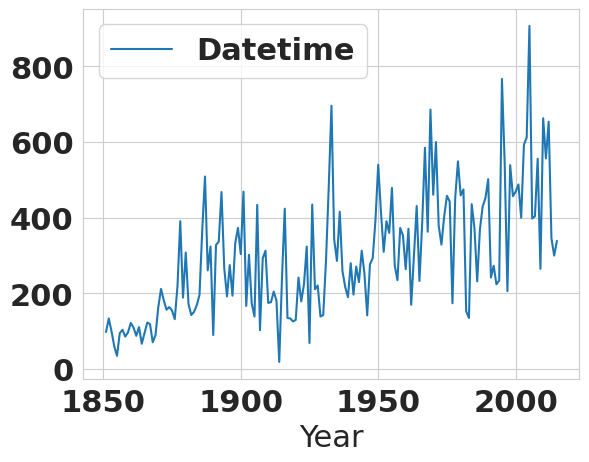

In [ ]:
count_df.plot(x="Year", y="Datetime")

In [ ]:
data=atlantic_df.set_index("Datetime")
data

,ID,Name,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
Datetime,,,,,,,,,,,,,,,,,,,,
1851-06-25 00:00:00,AL011851,UNNAMED,,HU,28.0,-94.8,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1851-06-25 06:00:00,AL011851,UNNAMED,,HU,28.0,-95.4,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1851-06-25 12:00:00,AL011851,UNNAMED,,HU,28.0,-96.0,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1851-06-25 18:00:00,AL011851,UNNAMED,,HU,28.1,-96.5,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1851-06-25 21:00:00,AL011851,UNNAMED,L,HU,28.2,-96.8,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-12 12:00:00,AL122015,KATE,,EX,41.3,-50.4,55,981,220,220,180,120,120,120,60,0,0,0,0,0
2015-11-12 18:00:00,AL122015,KATE,,EX,41.9,-49.9,55,983,220,220,180,120,120,120,60,0,0,0,0,0
2015-11-13 00:00:00,AL122015,KATE,,EX,41.5,-49.2,50,985,540,520,200,220,120,120,60,0,0,0,0,0


In [ ]:
data.head()

,ID,Name,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
Datetime,,,,,,,,,,,,,,,,,,,,
1851-06-25 00:00:00,AL011851,UNNAMED,,HU,28.0,-94.8,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1851-06-25 06:00:00,AL011851,UNNAMED,,HU,28.0,-95.4,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1851-06-25 12:00:00,AL011851,UNNAMED,,HU,28.0,-96.0,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1851-06-25 18:00:00,AL011851,UNNAMED,,HU,28.1,-96.5,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1851-06-25 21:00:00,AL011851,UNNAMED,L,HU,28.2,-96.8,80,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


###Data Visualization!!
####Year wise Frequency of Hurricanes.

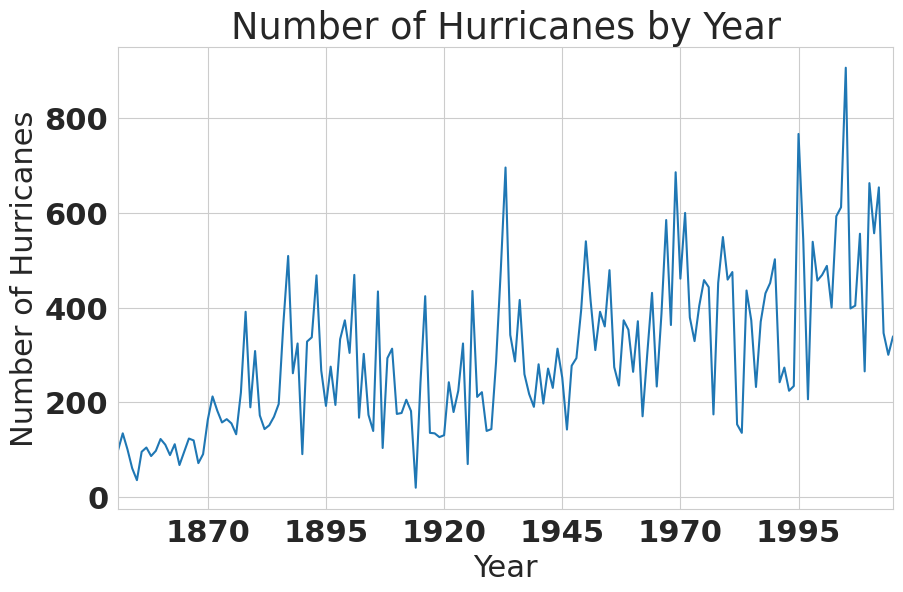

In [ ]:
#Plot the number of hurricanes by Year!
data.resample('Y').count()['Minimum Pressure'].plot(figsize=(10,6))
plt.title("Number of Hurricanes by Year")
plt.xlabel("Year")
plt.ylabel("Number of Hurricanes")
plt.show()

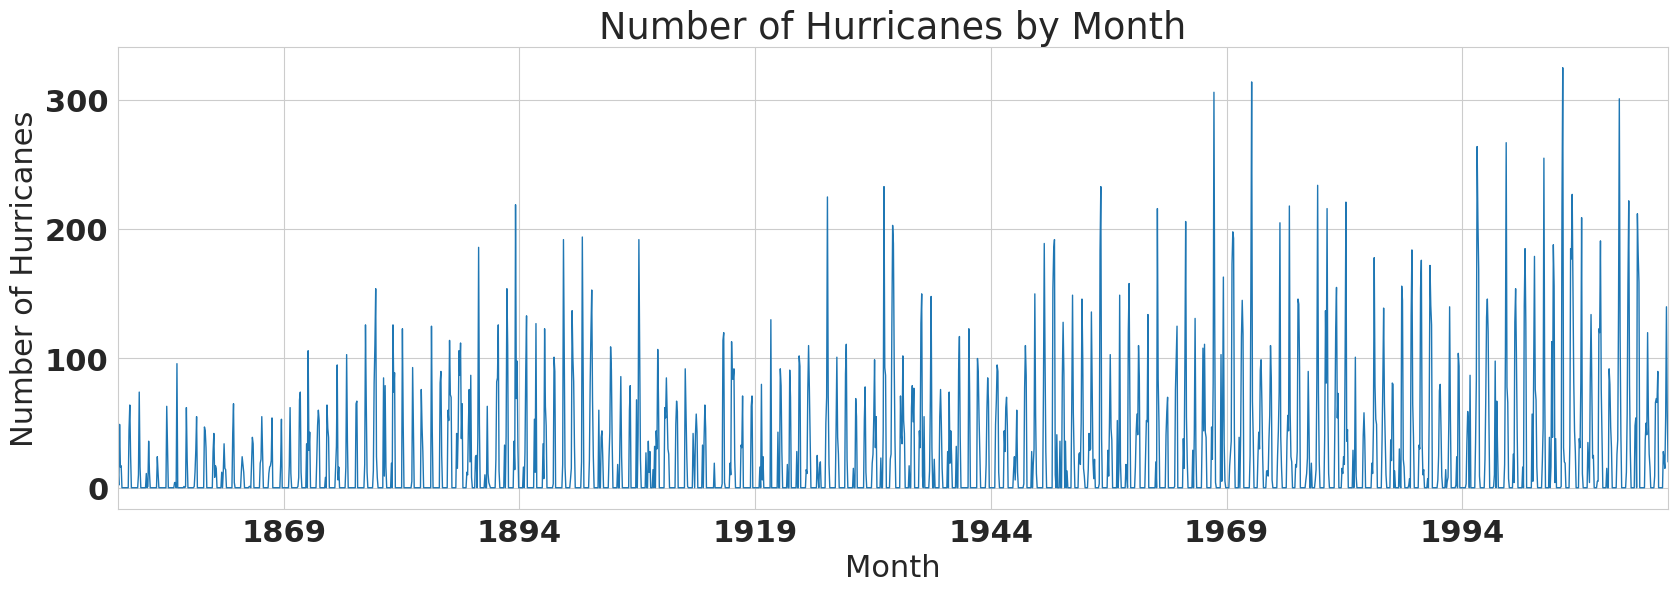

In [ ]:
#Plot the number of Hurricaes by month
data.resample('M').count()['Minimum Pressure'].plot(figsize=(20, 6), linewidth=1)
plt.title("Number of Hurricanes by Month")
plt.xlabel('Month')
plt.ylabel('Number of Hurricanes')
plt.show()

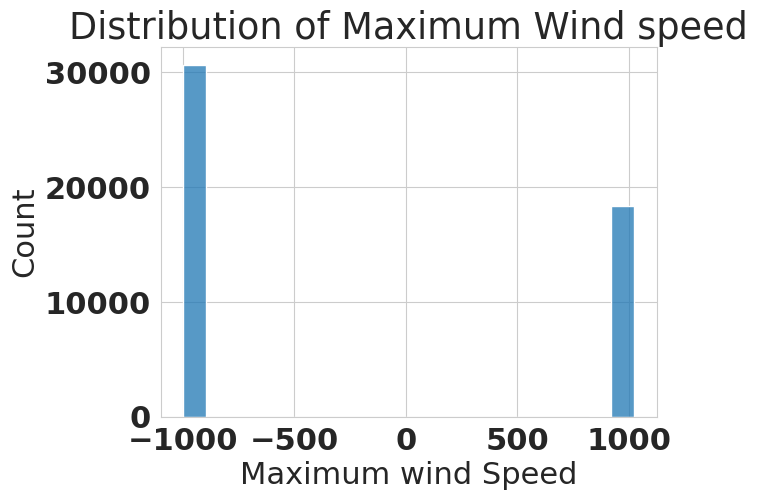

In [ ]:
#plot a histogram of the wind speed
sns.histplot(data["Minimum Pressure"], bins=20)
plt.title("Distribution of Maximum Wind speed")
plt.xlabel("Maximum wind Speed")
plt.show()

In [ ]:
data.columns

Index(['ID', 'Name', 'Event', 'Status', 'Latitude', 'Longitude',
       'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE',
       'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE',
       'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW'],
      dtype='object')

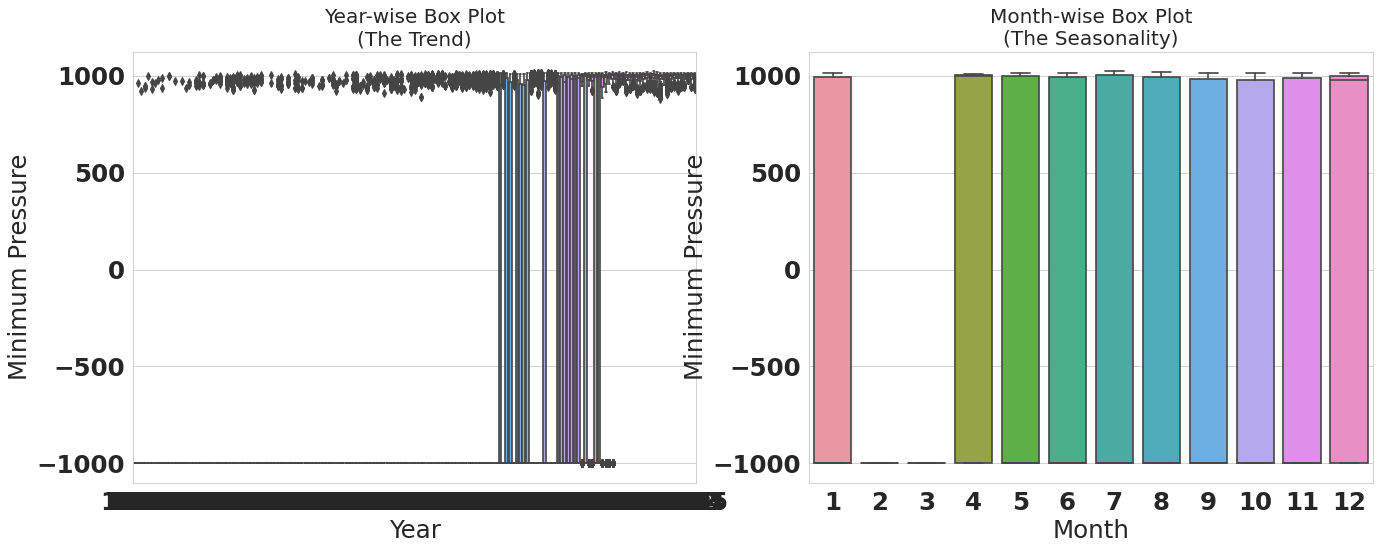

In [ ]:
data["Year"]=data.index.year
data["Month"]=data.index.month
fig, axes=plt.subplots(1, 2, figsize=(20, 7), dpi=80)
sns.boxplot(x="Year", y="Minimum Pressure", data=data, ax=axes[0])
sns.boxplot(x='Month', y='Minimum Pressure', data=data.loc[~data.Year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

###Model


ValueError: ignored

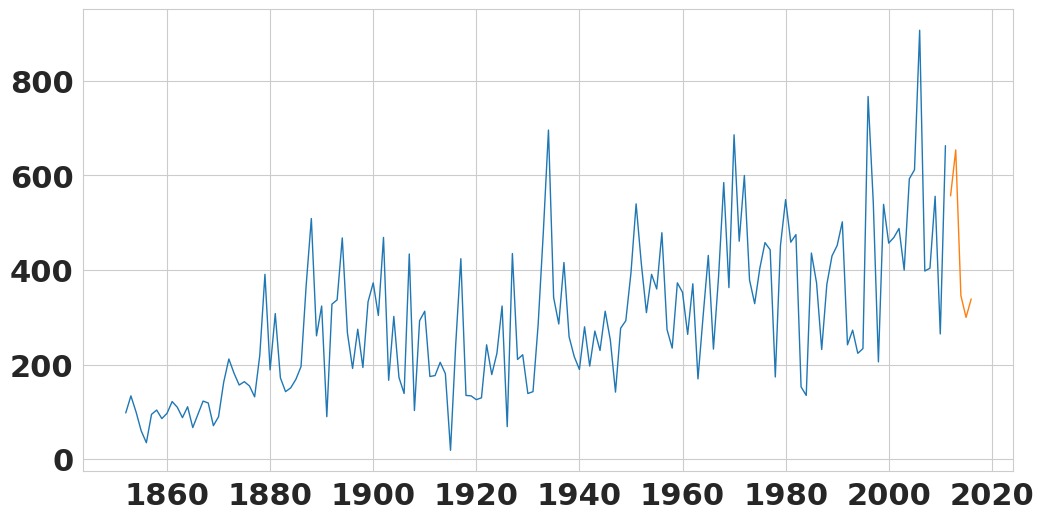

In [ ]:
#Resample the data by year!
y=data.resample("Y").count()["Minimum Pressure"]

#split the data into training and testing sets
train=y.iloc[:-5]
test=y.iloc[-5:]

#Fit a SARIMA model
model=sm.tsa.statespace.SARIMAX(train,order=(1,1,1), seasonal_order=(1,1,0,12), enforce_invertibility=False)
model_fit=model.fit()

#Generate forecasts for the test set
forecast=model_fit.forecast(step=5)

fig=plt.figure(figsize=(12, 6))

# Plot the training data, test data, and forecasts
plt.plot(train.index, train.values, label='Training',linewidth=1)
plt.plot(test.index, test.values, label='Test',linewidth=1)
plt.plot(test.index, forecast, label='Forecast',linewidth=1)
plt.title('Number of Hurricanes by Year',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Hurricanes',fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.show()





###Let's Try Forcasting!!

In [ ]:
import warnings
model_results = []
hurricanes_with_results = []

for key, group in data.groupby("ID"):

    hurricane = group.copy()

    # There are other observations that don't occur on a regular schedule. Ignore any tropical event with those observation

    max_seasonality_frequency = 10

    # Ignore hurricanes that do not have at least 10 observations
    if hurricane.shape[0] <= max_seasonality_frequency:
        # print("too short!")
        continue

    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            mod = sm.tsa.statespace.SARIMAX(hurricane['Minimum Pressure'],
                                            order=(1, 1, 1),
                                            seasonal_order=(2, 1, 0, 7),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
        params = results.params
        coefficients = params[:-1] #remove the sigma squared/SE parameter
        if ((coefficients < 1.0) & (coefficients > -1.0)).all():
            model_results.append(results)
            hurricanes_with_results.append(key)
    except ValueError as e:
        if str(e) == "maxlag should be < nobs":
            pass
        else:
            print("ValueError:", e)
    except np.linalg.linalg.LinAlgError as e:
        if str(e)[:54] == "Non-positive-definite forecast error covariance matrix":
            pass
        else:
            print("LinAlgError:", e)

In [ ]:
example_result = model_results[0]
example_result.params

In [ ]:
result_params_list = []
hurricanes_with_valid_results = []
for hurricane_id, result in zip(hurricanes_with_results, model_results):
    try:
        result_params_list.append(result.params)
        hurricanes_with_valid_results.append(hurricane_id)
    except ValueError:
        continue

In [ ]:
result_params = pd.DataFrame(result_params_list, index=hurricanes_with_valid_results)

In [ ]:
result_params.head()

In [ ]:
result_params.describe()

In [ ]:
result_params["ar.L1"].plot.hist()

In [ ]:
data[['ID', 'Name', 'Minimum Pressure']]

In [ ]:
hurricane_irene = data[data['Name']== '              IRENE']
hurricane_irene.head()

In [ ]:
mean_params = result_params.mean()

In [ ]:
irene_mod = sm.tsa.statespace.SARIMAX(hurricane_irene['Minimum Pressure'],
                                      order=(1, 1, 1),
                                      seasonal_order=(2, 1, 0, 7),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)

irene_results = irene_mod.filter(mean_params)

In [ ]:
irene_prediction = irene_results.get_forecast(5)
irene_prediction

In [ ]:
irene_prediction

In [ ]:
# Get forecast 5 steps ahead in future
irene_prediction = irene_results.get_forecast(steps=10)

# Get confidence intervals of forecasts
irene_prediction_ci = irene_prediction.conf_int()

ax = hurricane_irene['Minimum Pressure'].plot(label='observed', figsize=(12,6))
irene_prediction.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(irene_prediction_ci.index,
                irene_prediction_ci.iloc[:, 0],
                irene_prediction_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Minimum Pressure')

plt.legend()
plt.show()

In [ ]:
pred = irene_results.get_prediction(start=pd.to_datetime('2011-08-21'), dynamic=False)
pred_ci = pred.conf_int()

ax = hurricane_irene['Minimum Pressure']['2011-08-21':].plot(label='observed', figsize=(12,6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.set_xlabel('Date')
ax.set_ylabel('MinimumPressure')
plt.title("One-Step Ahead Forecast for Hurricane Irene")
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
# y_forecasted = irene_results.get_prediction(start=pd.to_datetime('2011-08-21'), dynamic=False)
y_truth = hurricane_irene['Minimum Pressure']['2011-08-21':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))